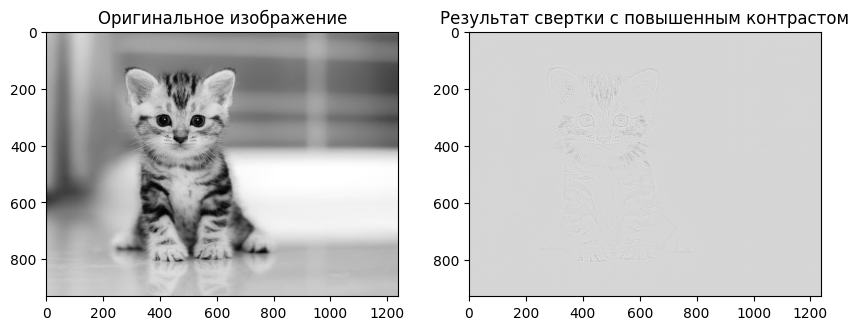

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Функция для выполнения свертки
def conv2d(image, kernel):
    img_height, img_width = image.shape
    kernel_size = kernel.shape[0]

    # Вычисляем размер выходного изображения
    output_height = img_height - kernel_size + 1
    output_width = img_width - kernel_size + 1
    output = np.zeros((output_height, output_width))

    # Выполняем свёртку
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(image[i:i+kernel_size, j:j+kernel_size] * kernel)

    return output

# Загрузим изображение котика и преобразуем его в градации серого
img_path = '/content/drive/MyDrive/Univer/cat.jpeg'
img = Image.open(img_path).convert('L')  # 'L' преобразует изображение в оттенки серого
img = np.array(img)

# Определяем ядро свертки (например, детектор краев)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Выполняем свёртку
conv_result = conv2d(img, kernel)

# Усилим контраст результата
conv_result = (conv_result - np.min(conv_result)) / (np.max(conv_result) - np.min(conv_result)) * 255
conv_result = np.clip(conv_result * 2, 0, 255)  # Умножаем на 2 для увеличения контраста
conv_result = conv_result.astype(np.uint8)  # Преобразуем в целые числа для изображения

# Визуализация исходного изображения и результата свёртки
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинальное изображение')

plt.subplot(1, 2, 2)
plt.imshow(conv_result, cmap='gray')
plt.title('Результат свертки с повышенным контрастом')

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


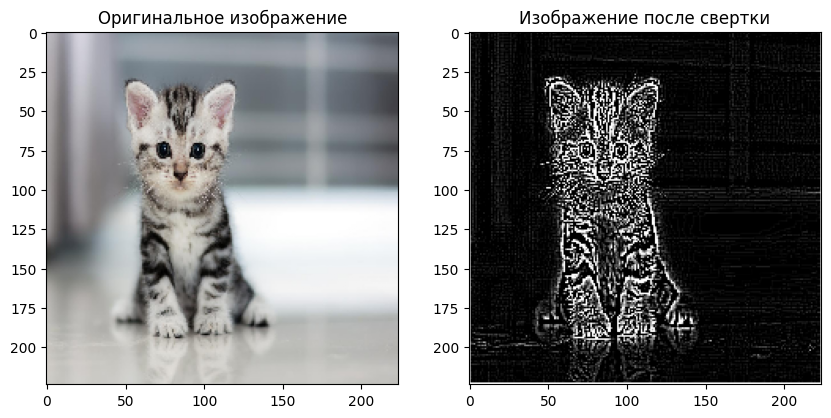

In [ ]:
# Подключаем необходимые библиотеки
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Подключаем Google Диск для доступа к изображению
from google.colab import drive
drive.mount('/content/drive')

# Загружаем изображение
img_path = '/content/drive/MyDrive/Univer/cat.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# Преобразуем изображение в массив чисел
img_array = image.img_to_array(img) / 255.0  # Преобразуем и нормализуем

# Добавляем размерность для батча
img_array = np.expand_dims(img_array, axis=0)

# Определяем ядро свертки (например, детектор краев)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Преобразуем ядро свертки для использования в TensorFlow
kernel = np.expand_dims(kernel, axis=-1)
kernel = np.repeat(kernel, 3, axis=-1)  # Повторяем для трех каналов (RGB)
kernel = np.expand_dims(kernel, axis=-1)
kernel = np.repeat(kernel, 3, axis=-1)

# Применяем свертку к изображению
conv_layer = tf.nn.conv2d(img_array, kernel, strides=[1, 1, 1, 1], padding='SAME')

# Преобразуем результат для визуализации
conv_img = np.squeeze(conv_layer)
conv_img = np.clip(conv_img, 0, 1)  # Ограничиваем значения для визуализации

# Отображаем исходное изображение и результат свертки
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array[0])  # Отображаем нормализованное изображение
plt.title('Оригинальное изображение')

plt.subplot(1, 2, 2)
plt.imshow(conv_img)
plt.title('Изображение после свертки')

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


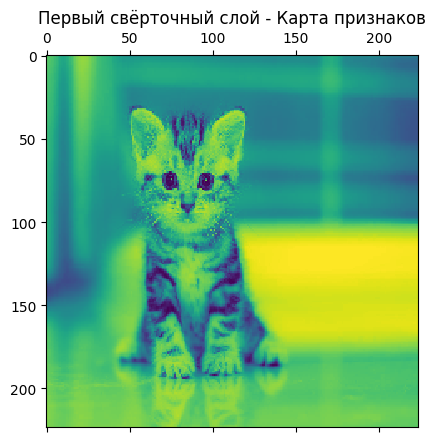

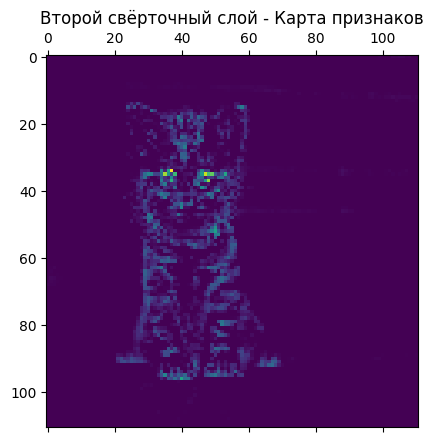

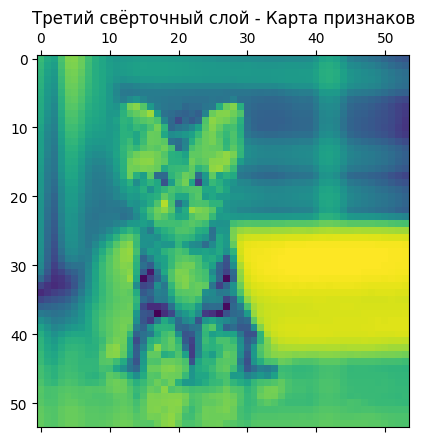

In [ ]:
# Подключаем необходимые библиотеки
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import drive

# Подключаем Google Диск для доступа к изображению
drive.mount('/content/drive')

# Загружаем изображение и преобразуем его в массив чисел
img_path = '/content/drive/MyDrive/Univer/cat.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Преобразуем и нормализуем
img_array = np.expand_dims(img_array, axis=0)  # Добавляем размерность для батча

# Создаём простую модель CNN с явным входным слоем
inputs = layers.Input(shape=(224, 224, 3))  # Указываем входной слой
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)  # Пример для 10 классов (можно изменить)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Компилируем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Прогоняем изображение через модель для определения входных данных
model.predict(img_array)  # Это нужно для установления input/output модели

# Извлекаем активации свёрточных слоев
layer_outputs = [layer.output for layer in model.layers[:6]]  # Получаем выходы первых 6 слоёв
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Применяем модель активации к изображению
activations = activation_model.predict(img_array)

# Визуализация первой свёртки (1 канал из первой свёрточной карты признаков)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.title('Первый свёрточный слой - Карта признаков')
plt.show()

# Выводим карту признаков из второго свёрточного слоя
second_layer_activation = activations[2]  # Второй свёрточный слой
plt.matshow(second_layer_activation[0, :, :, 0], cmap='viridis')
plt.title('Второй свёрточный слой - Карта признаков')
plt.show()

# Выводим третью карту признаков
third_layer_activation = activations[4]  # Третий свёрточный слой
plt.matshow(third_layer_activation[0, :, :, 0], cmap='viridis')
plt.title('Третий свёрточный слой - Карта признаков')
plt.show()
